In [70]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers,models
from keras.models import model_from_json

In [45]:
(train_img,train_labels),(test_img,test_labels)= datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [46]:
train_img

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [47]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [49]:
train_img,test_img = train_img/255,test_img/255

In [50]:
len(test_img)

10000

In [51]:
len(train_img)

60000

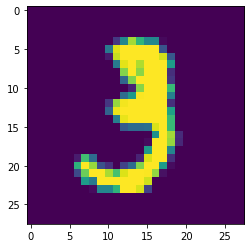

In [52]:
plt.imshow(train_img[10])

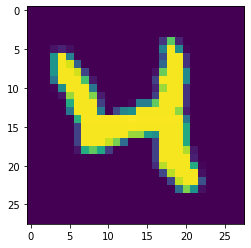

In [54]:
plt.imshow(train_img[20])

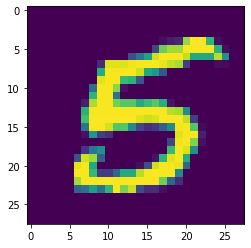

In [57]:
plt.imshow(train_img[20000])

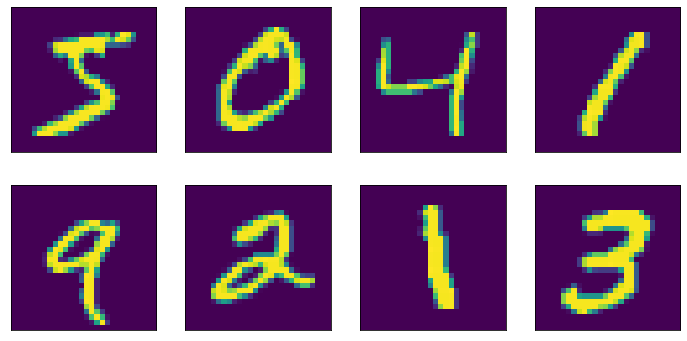

In [59]:
plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_img[i])
    
plt.show()

In [60]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [61]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [64]:
model.fit(train_img ,train_labels, epochs=10 ,validation_data=(test_img,test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2921 - accuracy: 0.9148 - val_loss: 0.1495 - val_accuracy: 0.9557
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1435 - accuracy: 0.9577 - val_loss: 0.0968 - val_accuracy: 0.9702
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1081 - accuracy: 0.9665 - val_loss: 0.0846 - val_accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0885 - accuracy: 0.9723 - val_loss: 0.0799 - val_accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0745 - accuracy: 0.9765 - val_loss: 0.0858 - val_accuracy: 0.9746
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0654 - accuracy: 0.9792 - val_loss: 0.0759 - val_accuracy: 0.9790
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0574 - accuracy: 0.9818 - val_loss: 0.0698 - val_accuracy

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [72]:
score= model.evaluate(test_img,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0680 - accuracy: 0.9819


In [76]:
print('loss',score[0]*100)
print('accuracy',score[1]*100)

loss 6.795020401477814
accuracy 98.18999767303467


In [77]:
model_json=model.to_json()
with open("model.json",'w') as file :
    file.write(model_json)

In [78]:
model.save_weights('weights.h5')

In [79]:
from tensorflow.keras.models import model_from_json

with open("model.json",'r') as file:
    model_json= file.read()
    
loaded_model= model_from_json(model_json)

In [80]:
loaded_model.load_weights('weights.h5')

In [84]:
loaded_model.predict(train_img)

1875/1875 [==============================] - 5s 2ms/step


array([[2.1513227e-15, 4.0926526e-11, 5.9621583e-12, ..., 6.7604792e-13,
        5.5195788e-15, 4.5166532e-10],
       [9.9999762e-01, 5.0611419e-13, 2.3074365e-06, ..., 1.2558145e-08,
        2.4752684e-11, 1.2909864e-08],
       [1.0410071e-13, 7.8475254e-10, 4.9952604e-08, ..., 1.1140624e-07,
        5.9066942e-08, 7.9077545e-08],
       ...,
       [6.7250560e-14, 2.0360590e-14, 2.5923123e-16, ..., 4.8222269e-16,
        9.4529055e-12, 7.5080884e-09],
       [2.5832794e-06, 3.5238410e-09, 7.2789942e-07, ..., 6.2245303e-10,
        6.1744949e-08, 3.3375500e-11],
       [2.4976565e-08, 1.3931726e-09, 1.0327275e-07, ..., 1.2720598e-07,
        9.9996126e-01, 3.6087011e-05]], dtype=float32)